In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display


def game_of_life(initial_state, n):
    """
    Simulate the Game of Life for n time steps.
    
    Parameters:
    initial_state (2D array): Initial state of the grid.
    n (int): Number of time steps to simulate.
    
    Returns:
    List of 2D arrays: History of states, including the initial state.
    """
    def get_neighbour_count(grid, row, col):
        """Return the number of live neighbours around the given cell."""
        count = 0
        for i in range(max(0, row-1), min(row+2, grid.shape[0])):
            for j in range(max(0, col-1), min(col+2, grid.shape[1])):
                count += grid[i, j]
        count -= grid[row, col]  # Subtract the cell itself
        return count
    
    history = [initial_state]
    current_state = np.copy(initial_state)
    
    for _ in range(n):
        new_state = np.copy(current_state)
        rows, cols = current_state.shape
        
        for row in range(rows):
            for col in range(cols):
                live_neighbours = get_neighbour_count(current_state, row, col)
                
                # Apply the Game of Life rules
                if current_state[row, col] == 1 and live_neighbours < 2:
                    new_state[row, col] = 0  # Die from underpopulation
                elif current_state[row, col] == 1 and live_neighbours > 3:
                    new_state[row, col] = 0  # Die from overpopulation
                elif current_state[row, col] == 0 and live_neighbours == 3:
                    new_state[row, col] = 1  # Become alive through reproduction
                
        history.append(new_state)
        current_state = new_state
    
    return history


def display_game_of_life_as_gif(history, filename='game_of_life.gif'):
    """
    Create and display a GIF from the history of states in the Game of Life simulation,
    with the GIF looping indefinitely.

    Parameters:
    history (list of 2D arrays): The history of states from the Game of Life simulation.
    filename (str): Path to save the GIF file.
    """
    with imageio.get_writer(filename, mode='I', duration=0.5, loop=0) as writer:
        for state in history:
            # Create a plot for each state
            plt.figure(figsize=(5,5))
            plt.imshow(state, cmap='binary')
            plt.axis('off')
            # Save plot to a temporary PNG file
            temp_filename = '/tmp/temp_image.png'
            plt.savefig(temp_filename, bbox_inches='tight', pad_inches=0.0)
            plt.close()
            # Append the image to the GIF
            image = imageio.imread(temp_filename)
            writer.append_data(image)
    
    # Display the GIF in the notebook
    display(Image(filename=filename))


def generate_initial_state(size, density):
    """
    Generate a random initial state for the Game of Life.

    Parameters:
    size (int): The width and height of the square grid.
    density (float): The density of live cells (1s) in the grid, ranging from 0 to 1.

    Returns:
    2D numpy array: The generated initial state of the grid.
    """
    if not 0 <= density <= 1:
        raise ValueError("Density must be between 0 and 1.")
    
    # Initialize the grid with random states based on the density
    initial_state = np.random.choice([1, 0], size=(size, size), p=[density, 1-density])
    
    return initial_state

def text_to_numpy(text_state):
    """
    Convert a text representation of the Game of Life configuration into a NumPy array.
    
    Parameters:
    text_state (str): Multiline string representation of the Game of Life configuration,
                      where 'O' represents a live cell and '.' represents a dead cell.
    
    Returns:
    numpy.ndarray: A 2D NumPy array representing the initial state of the configuration.
    """
    # Split the input text into lines and determine the dimensions
    lines = text_state.strip().split('\n')
    height = len(lines)
    width = len(lines[0])
    
    # Initialize an empty grid
    grid = np.zeros((height, width), dtype=int)
    
    # Populate the grid based on the text representation
    for i, line in enumerate(lines):
        for j, char in enumerate(line):
            if char == 'O':
                grid[i, j] = 1  # Live cell
            # No need to explicitly set dead cells as the grid is initialized with zeros
    
    return grid

import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

def display_gol_history(history):
    """
    Display Game of Life history with a manual slider to control the displayed time step.

    Parameters:
    history (list of numpy.ndarray): The history of states in the Game of Life simulation.
    """
    @widgets.interact
    def plot_step(step=(0, len(history)-1)):
        plt.figure(figsize=(5,5))
        plt.imshow(history[step], cmap='binary')
        plt.title(f"Step: {step}")
        plt.axis('off')
        plt.show()

In [2]:
# Example usage:
size = 40  # Size of the grid (10x10)
density = 0.4  # 30% of the cells are alive initially
initial_state = generate_initial_state(size, density)
print(initial_state)
history = game_of_life(initial_state, 200)

[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 1 0]
 [0 1 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 1 0]
 [1 1 1 ... 0 0 1]
 [0 0 0 ... 0 1 1]]


/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_20570/2092276271.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(temp_filename)


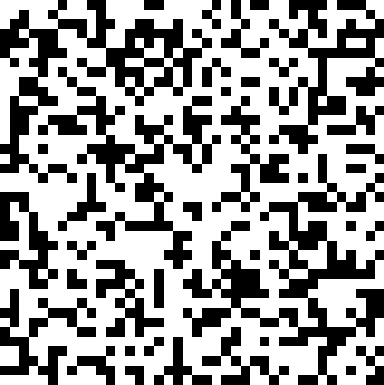

In [3]:
display_game_of_life_as_gif(history)

In [4]:
# Example usage
text_state = """
.........O..........................
.......O.O..........................
........OO..........................
....................................
....................................
....................................
....................................
................O...................
.................O..................
...............OOO..................
....................................
.......................O.O..........
.....................O...O..........
.............O.......O..............
............OOOO....O....O........OO
...........OO.O.O....O............OO
OO........OOO.O..O...O...O..........
OO.........OO.O.O......O.O..........
............OOOO....................
.............O......................
"""
initial_state2 = text_to_numpy(text_state)
history2 = game_of_life(initial_state2, 50)

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_20570/2092276271.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(temp_filename)


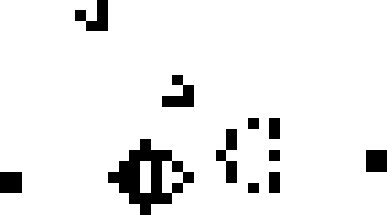

In [5]:
display_game_of_life_as_gif(history2)

In [6]:
display_gol_history(history2)

interactive(children=(IntSlider(value=25, description='step', max=50), Output()), _dom_classes=('widget-intera…

In [7]:
text_state = """
............................................OO....
............................................OO....
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
..................................................
.........................................OO.O.OO..
..................................................
.........................................O.....O..
..................................................
..........................................OO.OO...
............................................O.....
..................................................
..................................................
......................................OO......O...
.....................................O.O.....O.O..
............O..........................O....O...O.
.............O..............................OOOOO.
...........OOO.............................OO...OO
............................................OOOOO.
.............................................OOO..
..............................................O...
........................OO....OOO.................
........................OO......O.................
...............................O..................
..................................................
..................................................
..................................................
..................................................
.......................OO.........................
......................O.O.....................OO..
........................O.....................OO..
.............O....................................
............OOOO..................................
...........OO.O.O......O.O........................
OO........OOO.O..O...O...O........................
OO.........OO.O.O....O............................
............OOOO....O....O........................
.............O.......O............................
.....................O...O......OO................
.......................O.O......O.O...............
..................................O...............
..................................OO..............
"""

initial_state3 = text_to_numpy(text_state)
history3 = game_of_life(initial_state3, 500)

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_20570/2092276271.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(temp_filename)


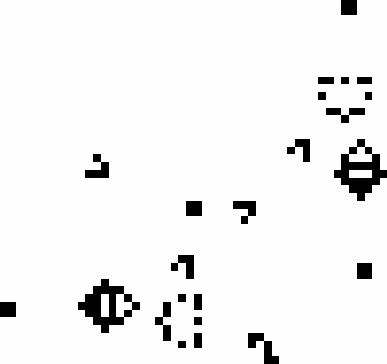

In [8]:
display_game_of_life_as_gif(history3)

In [9]:
text_state = """
.O............O.......O............O.
.O............O.......O............O.
O.O..........O.O.....O.O..........O.O
.O............O.......O............O.
.O............O.......O............O.
..O...OOOO...O.........O...OOOO...O..
......OOOO........O........OOOO......
..OOOO....OOOO..OOOOO..OOOO....OOOO..
...............O.O.O.O...............
....O......O.............O......O....
.....OO..OO......O.O......OO..OO.....
..............O..O.O..O..............
..............O..O.O..O..............
..............O.O...O.O..............
.....................................
.....................................
..............OO.....OO..............
..............OO.....OO..............
.....................................
................OO.OO................
...............O.O.O.O...............
...............O.O.O.O...............
.................O.O.................
...............OO...OO...............
"""
initial_state5 = text_to_numpy(text_state)

In [11]:
length = 80
i = np.zeros((length, length))
i[length-initial_state5.shape[0]:length,
  length-initial_state5.shape[1]:length] = initial_state5
i

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_20570/2092276271.py:72: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(temp_filename)


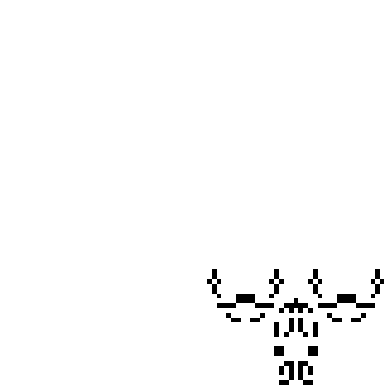

In [12]:
history5 = game_of_life(i, 200)
display_game_of_life_as_gif(history5)

In [13]:
display_gol_history(history5)

interactive(children=(IntSlider(value=100, description='step', max=200), Output()), _dom_classes=('widget-inte…